In [109]:
import copy
import PIL
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from model import Company, StockLog, IndexLog, PerformanceLog, TestTable
from model import start_engine
from datetime import date, datetime

%matplotlib inline
warnings.filterwarnings("ignore")

In [87]:
engine = start_engine()

In [117]:
def get_plot(
    stocks,                     # list of stocks 
    indicies = [],              # list of fundamental indicies
    size = (12, 4),             # graph (length, height)
    start = '2009-07-01',       # start date in 'YYYY-MM-DD' format
    finish = None,              # finish date in 'YYYY-MM-DD' format
    title = None,               # graph title
    engine = engine,
    change = False,
    # observations
    opening = False,
    high = False,
    low = False,
    closing = False,
    adjusted = False,
    volume = False,
    # technicals
    sma15 = False,
    sma50 = False,
    sma200 = False,
    ema15 = False,
    ema50 = False,
    ema200 = False,
    macd = False,
    bb = False,
    stoch = False,
    rsi = False,
    adx = False,
    cci = False,
    aroon = False,
    chaikin = False,
    obv = False,
    mom = False,
    # fundamentals
    pe_ratio = False,
    dp_ratio = False,
    pb_ratio = False):
    
    if (len(stocks) == 0) and (len(indicies) == 0):
        raise Exception('Empty list')
    
    if not engine:
        engine = start_engine()

    (x, y) = size
    plt.figure(figsize=(x, y), dpi=100)
      
    start = start = datetime.strptime(start, '%Y-%m-%d').date()
    if finish:
        finish = datetime.strptime(finish, '%Y-%m-%d').date()
     
    companies = [Company().query().get(stock) for stock in stocks]
    for company in companies:
        stock_log = TestTable().query().filter((TestTable.company == company) &
                                               (TestTable.date >= start) &
                                               (TestTable.date <= finish))
        df = pd.read_sql(stock_log.statement, engine)
        df.sort_values(by='date', inplace=True)
        df.set_index('date', inplace=True)
        if len(companies) > 1:
            plt.plot(df.index, df['closing'], label='Closing of %s' % company.code)

    if opening:
        plt.plot(df.index, df['opening'], label='Opening of %s' % company.code)
    if high:
        plt.plot(df.index, df['high'], label='High of %s' % company.code)
    if low:
        plt.plot(df.index, df['low'], label='Low of %s' % company.code)
    if closing:
        plt.plot(df.index, df['closing'], c='r', label='Closing of %s' % company.code)        
    if adjusted:
        plt.plot(df.index, df['adjusted'], label='Adjusted close of %s' % company.code)
    if volume:
        plt.bar(df.index, df['volume'], label='Volume of %s' % company.code)
    if change:
        plt.bar(df.index, df['change'], label='Change in % of %s' % company.code)        
    if sma15:
        plt.plot(df.index, df['sma15'], label='SMA15 of %s' % company.code)
    if sma50:
        plt.plot(df.index, df['sma50'], label='SMA50 of %s' % company.code)
    if sma200:
        plt.plot(df.index, df['sma200'], label='SMA200 of %s' % company.code)        
    if ema15:
        plt.plot(df.index, df['ema15'], label='EMA15 of %s' % company.code)
    if ema50:
        plt.plot(df.index, df['ema50'], label='EMA50 of %s' % company.code)
    if ema200:
        plt.plot(df.index, df['ema200'], label='EMA200 of %s' % company.code) 
    if macd:
        plt.plot(df.index, df['macd'], label='MACD of %s' % company.code)
        plt.plot(df.index, df['macd_sig'], label='Signal of %s' % company.code)
        plt.bar(df.index, df['macd_hist'], color='g')
        plt.axhline(y=0.0, color='r', linestyle='--')
    if bb:
        plt.plot(df.index, df['closing'], c='r', label='Closing of %s' % company.code)   
        plt.plot(df.index, df['bb_hi'], c='c', linestyle='--', label='BB Hi of %s' % company.code)
        plt.plot(df.index, df['bb_lo'], c='c', linestyle='--', label='BB Lo of %s' % company.code)
        plt.fill_between(df.index, df['bb_lo'], df['bb_hi'], alpha=0.25)
    if stoch:
        plt.plot(df.index, df['slowk'], label='Slow K of %s' % company.code)
        plt.plot(df.index, df['slowd'], label='Slow D of %s' % company.code)
        plt.axhline(y=80, c='c', linestyle='--')
        plt.axhline(y=20, c='c', linestyle='--')
        plt.ylim(0, 100)
    if rsi:
        plt.plot(df.index, df['rsi'], label='RSI of %s' % company.code) 
        plt.axhline(y=70, c='c', linestyle='--')
        plt.axhline(y=30, c='c', linestyle='--')   
        plt.ylim(0, 100)
    if adx:
        plt.plot(df.index, df['adx'], label='ADX of %s' % company.code)         
        plt.axhline(y=25, c='c', linestyle='--')   
        plt.ylim(0, 100)
    if cci:
        plt.plot(df.index, df['cci'], label='CCI of %s' % company.code)         
        plt.axhline(y=100, c='c', linestyle='--')
        plt.axhline(y=-100, c='c', linestyle='--')         
    if aroon:
        plt.plot(df.index, df['aroon_up'], label='Aroon Up  of %s' % company.code)  
        plt.plot(df.index, df['aroon_dn'], label='Aroon Down of %s' % company.code)  
        plt.ylim(0, 100)
    if chaikin:
        plt.plot(df.index, df['chaikin'], label='Chaikin A/D  of %s' % company.code)  
        plt.axhline(y=0, c='c', linestyle='--')
    if obv:
        plt.plot(df.index, df['obv'], label='OBV of %s' % company.code)  
    if mom:
        plt.plot(df.index, df['mom'], label='Momentum of %s' % company.code)  
    if pe_ratio:
        plt.plot(df.index, df['pe_ratio'], label='PE Ratio of %s' % company.code) 
    if dp_ratio:
        plt.plot(df.index, df['dp_ratio'], label='DP Ratio of %s' % company.code) 
    if pb_ratio:
        plt.plot(df.index, df['pb_ratio'], label='PB Ratio of %s' % company.code)         
    
#     if len(indicies) > 0:
#         sectors = {'Consumer Discretionary': 'discretionary',
#                    'Consumer Staples': 'staples',
#                    'Energy': 'energy',
#                    'Financials': 'financials',
#                    'Health Care': 'healthcare',
#                    'Industrials': 'industrials',
#                    'Information Technology': 'infotech',
#                    'Materials': 'materials',
#                    'Telecommunication Services': 'telecom',
#                    'Utilities': 'utilities',
#                    'Real Estate': 'realestate'}
#         sectors_cpy = copy.deepcopy(sectors)
#         sectors_cpy.pop(company.sector)
#         sectors_cpy = set([sectors_cpy[sector] for sector in sectors_cpy])

#         index_log = IndexLog().query().filter((IndexLog.date >= start) & (IndexLog.date <= finish))
#         fi = pd.read_sql(index_log.statement, engine)
#         indicies = set(fi['index'])
#         indicies -= sectors_cpy

#         for idx in indicies:
#             new = fi.loc[fi['index'] == idx]
#             new = new.rename(columns={'value': idx})
#             new.sort_values(by='date', inplace=True)
#             new.set_index('date', inplace=True)
#             new.drop(new.columns[[0]], axis=1, inplace=True)
#             df = df.merge(new, how='outer', left_index=True, right_index=True)
#         df.rename(columns={sectors[company.sector]: 'sector'}, inplace=True)
#         df.dropna(subset=['opening'], inplace=True)
#         for idx in indicies:
#             plt.plot(df.index, df[idx], label=idx)    
        
    plt.legend()
    plt.savefig('plot.png', format='png')
    plt.close()     
    img = PIL.Image.open('plot.png')
    return img

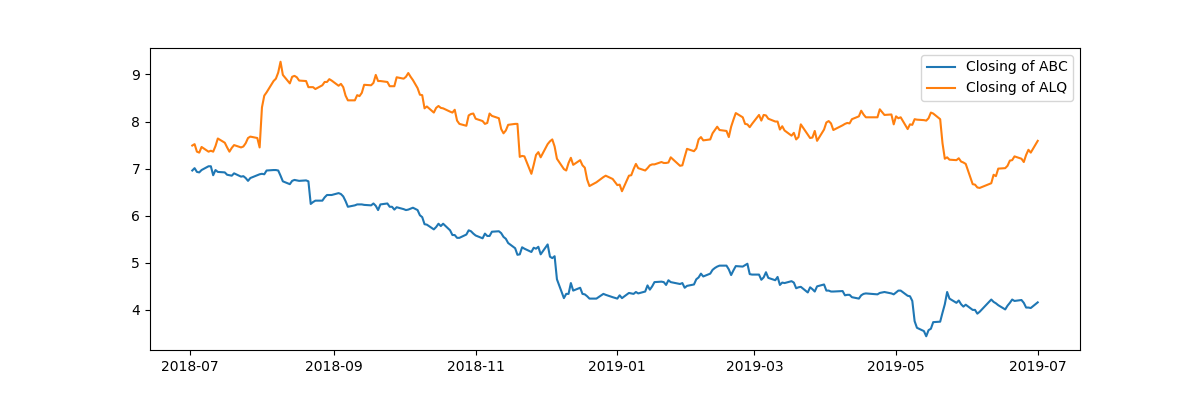

In [119]:
get_plot(['ABC', 'ALQ'], start='2018-07-01', finish='2019-07-01')

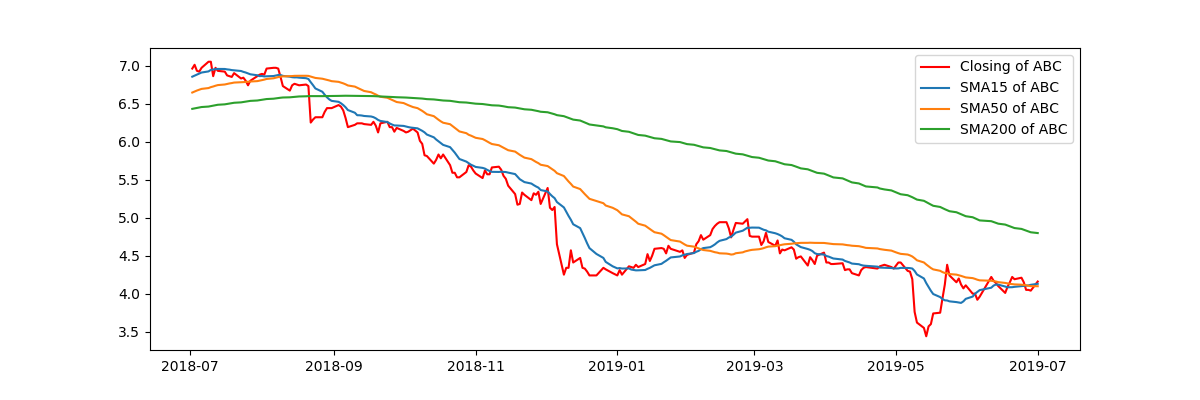

In [81]:
get_plot(['ABC'], closing=1, sma15=1, sma50=1, sma200=1, start='2018-07-01', finish='2019-07-01')

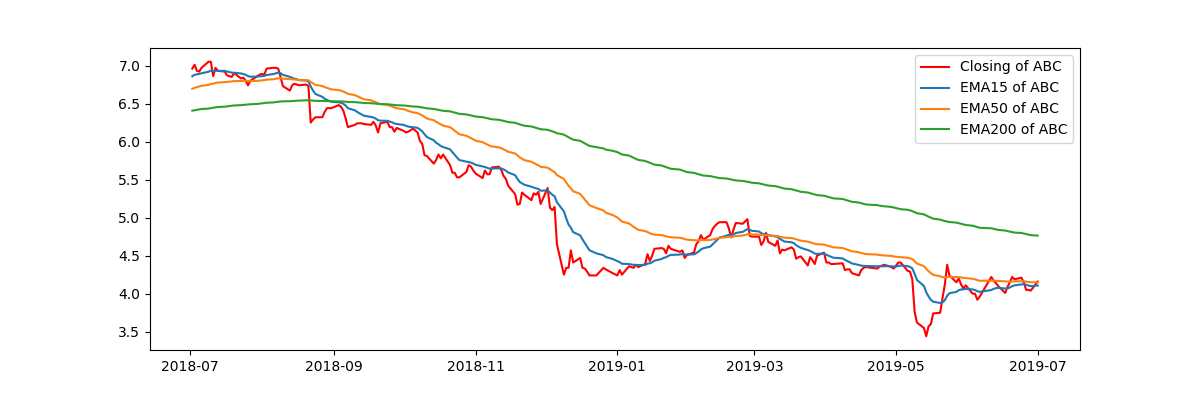

In [48]:
get_plot(['ABC'], closing=1, ema15=1, ema50=1, ema200=1, start='2018-07-01', finish='2019-07-01')

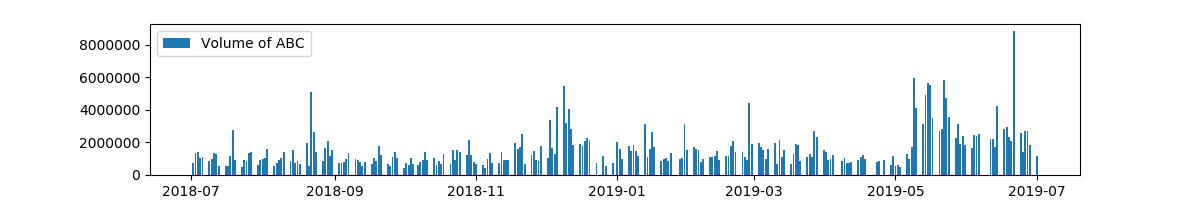

In [49]:
get_plot(['ABC'], volume=1, size=(12, 2), start='2018-07-01', finish='2019-07-01')

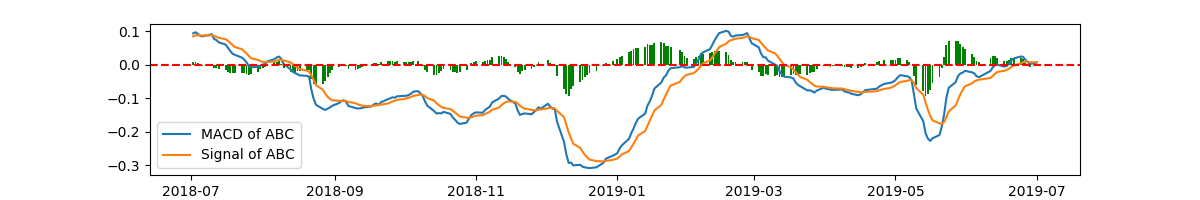

In [71]:
get_plot(['ABC'], macd=1, size=(12, 2), start='2018-07-01', finish='2019-07-01')

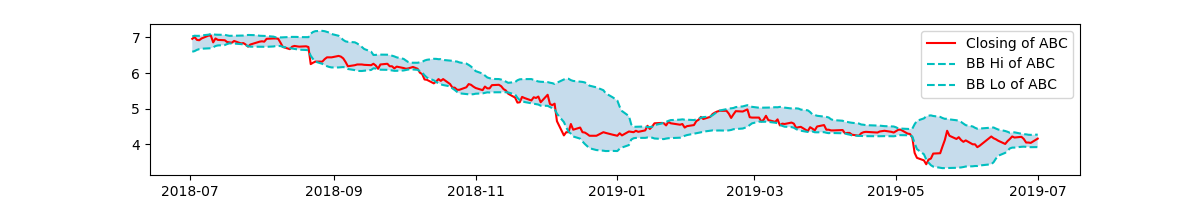

In [55]:
get_plot(['ABC'], bb=1, size=(12, 2), start='2018-07-01', finish='2019-07-01')

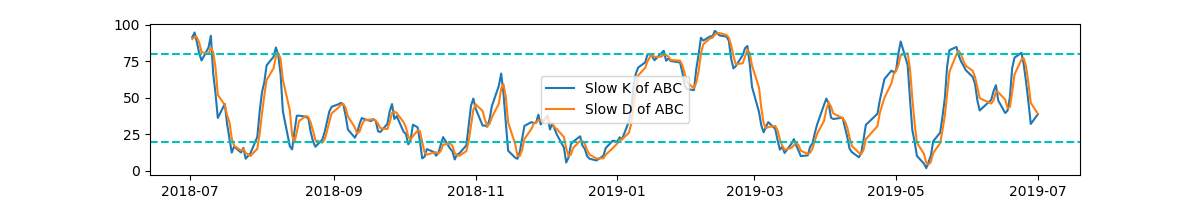

In [59]:
get_plot(['ABC'], stoch=1, size=(12, 2), start='2018-07-01', finish='2019-07-01')

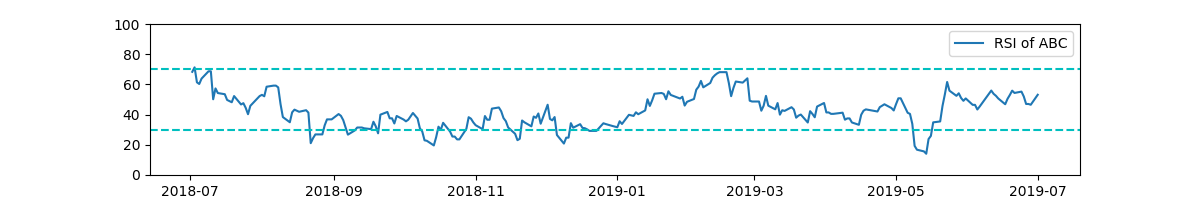

In [63]:
get_plot(['ABC'], rsi=1, size=(12, 2), start='2018-07-01', finish='2019-07-01')

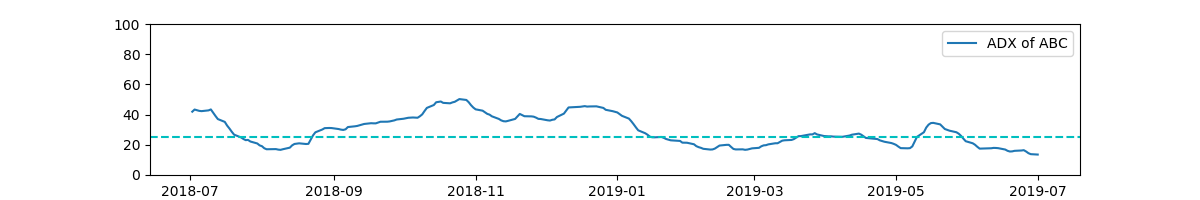

In [73]:
get_plot(['ABC'], adx=1, size=(12, 2), start='2018-07-01', finish='2019-07-01')

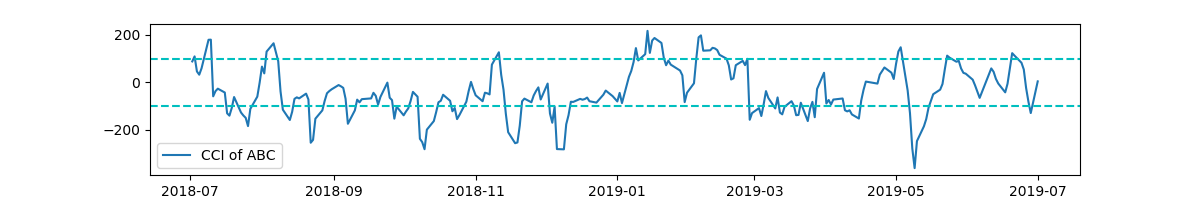

In [75]:
get_plot(['ABC'], cci=1, size=(12, 2), start='2018-07-01', finish='2019-07-01')

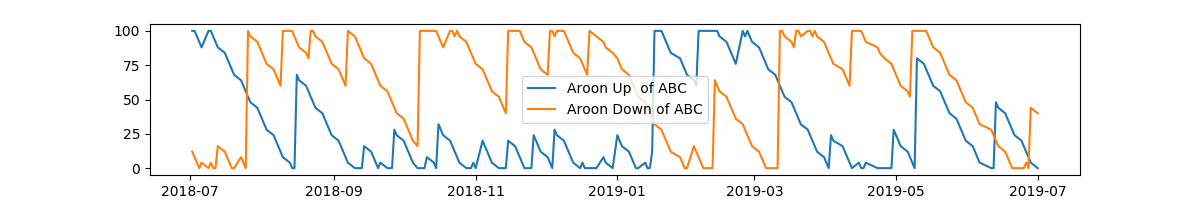

In [83]:
get_plot(['ABC'], aroon=1, size=(12, 2), start='2018-07-01', finish='2019-07-01')

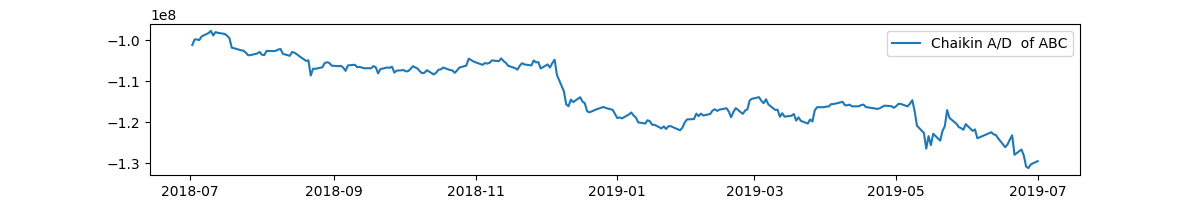

In [84]:
get_plot(['ABC'], chaikin=1, size=(12, 2), start='2018-07-01', finish='2019-07-01')

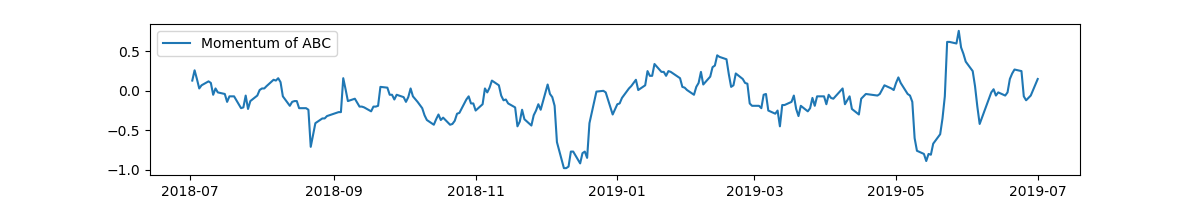

In [85]:
get_plot(['ABC'], mom=1, size=(12, 2), start='2018-07-01', finish='2019-07-01')

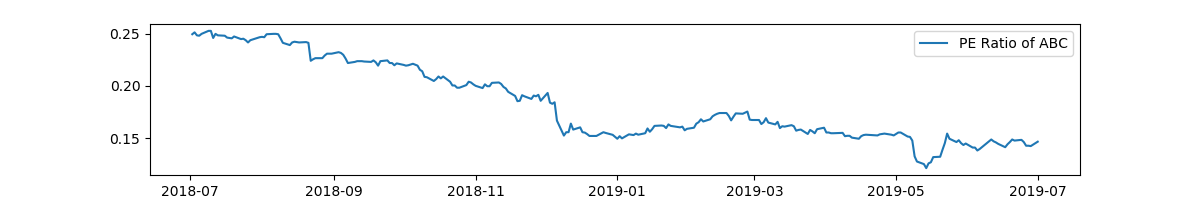

In [93]:
get_plot(['ABC'], pe_ratio=1, size=(12, 2), start='2018-07-01', finish='2019-07-01')

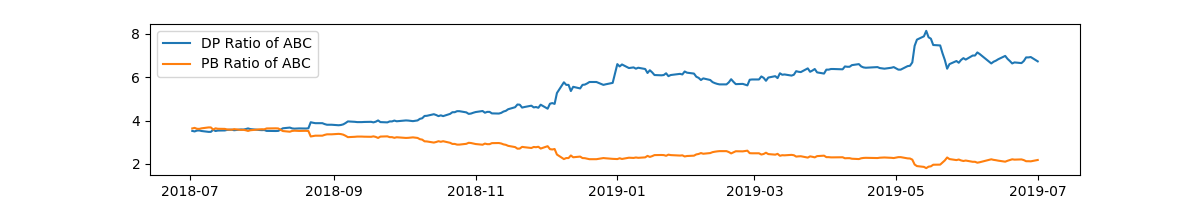

In [94]:
get_plot(['ABC'], dp_ratio=1, pb_ratio=1, size=(12, 2), start='2018-07-01', finish='2019-07-01')